# Diabetes Prediction Using KNN

#### Load File and Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
datashape = df.shape
print(f"Total {datashape[0]} samples along with {datashape[1]} features are present in the dataset")

Total 768 samples along with 9 features are present in the dataset


### Exploratory Data Analysis

In [14]:
df.isnull().values.any()

False

In [15]:
for i in df.columns.to_list():
    if df[i].dtype != 'int64':
        print(f'Feature  ::::: {i}')
        print(df[i].value_counts())
        print('\n \n#####\n \n')

Feature  ::::: BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

 
#####
 

Feature  ::::: DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

 
#####
 



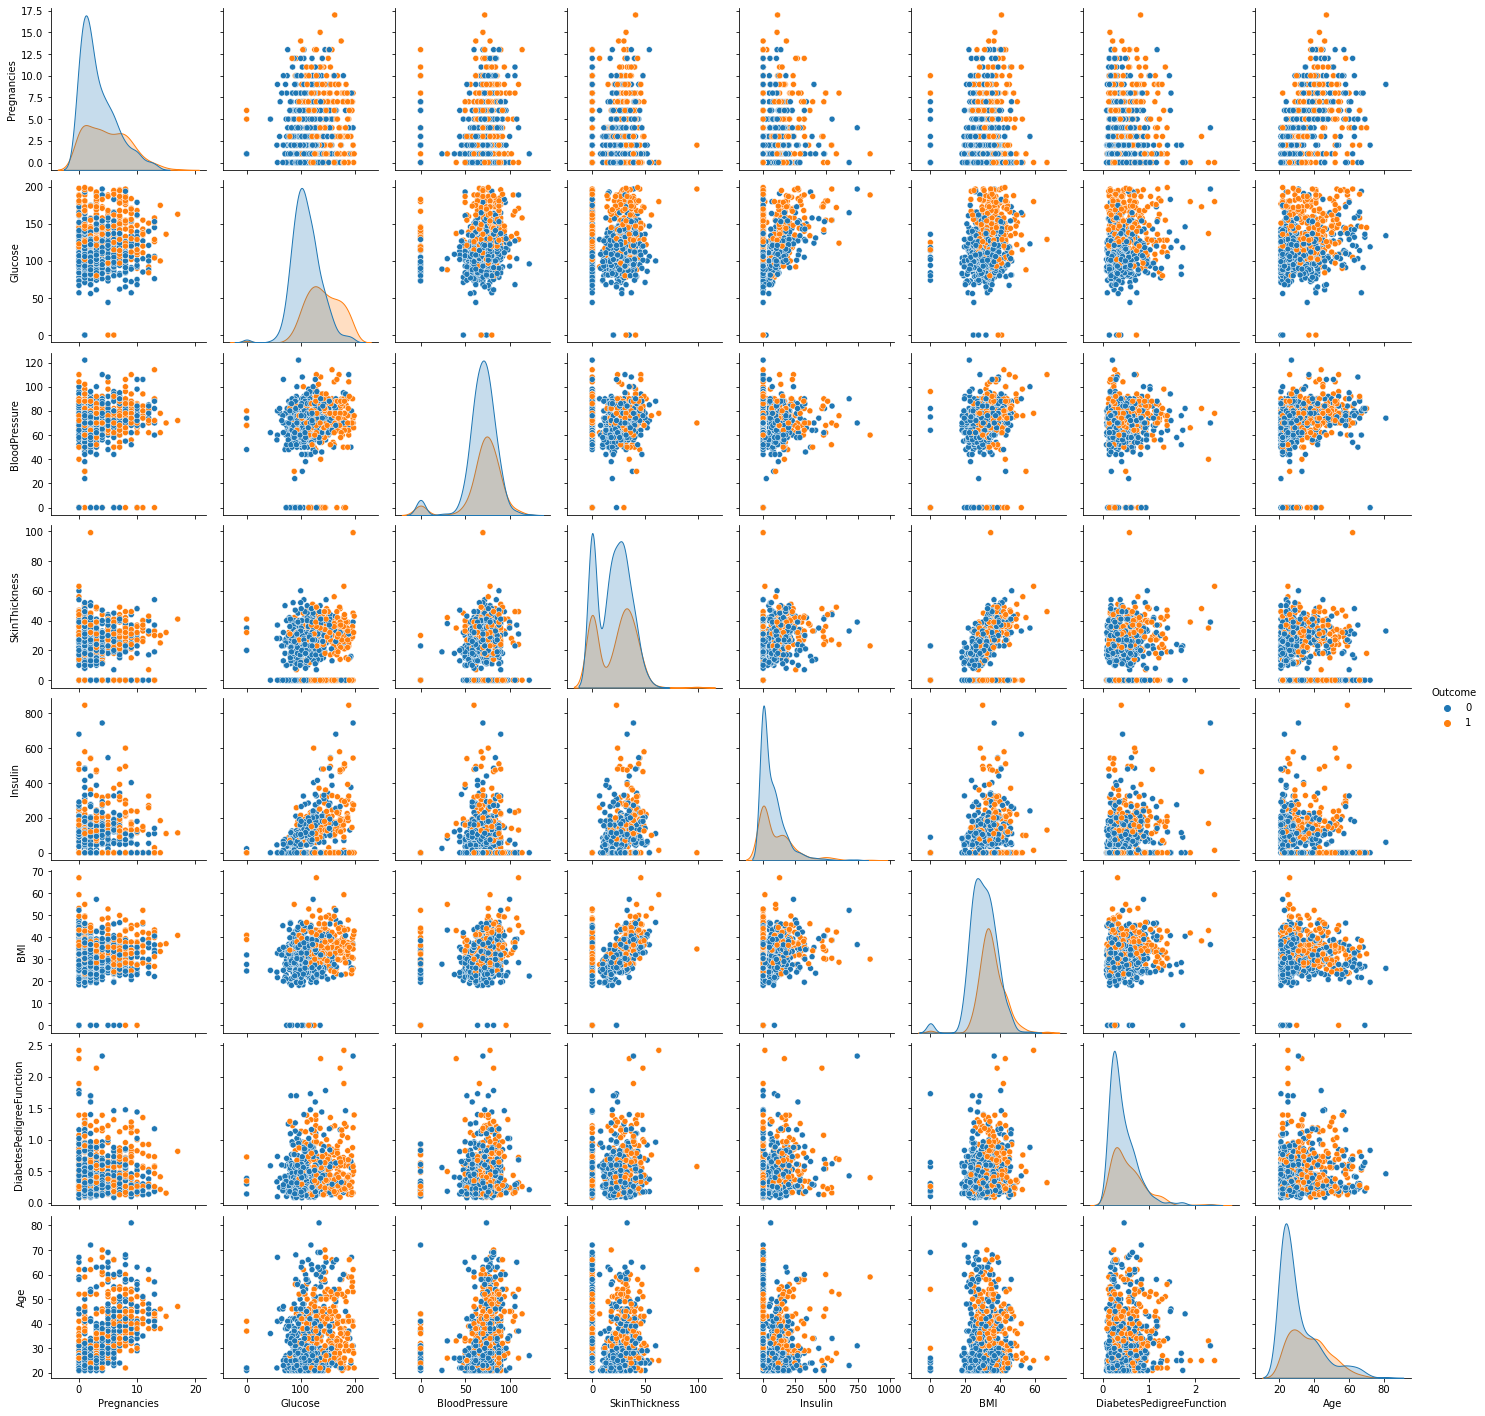

In [16]:
sns.pairplot(df,hue='Outcome')

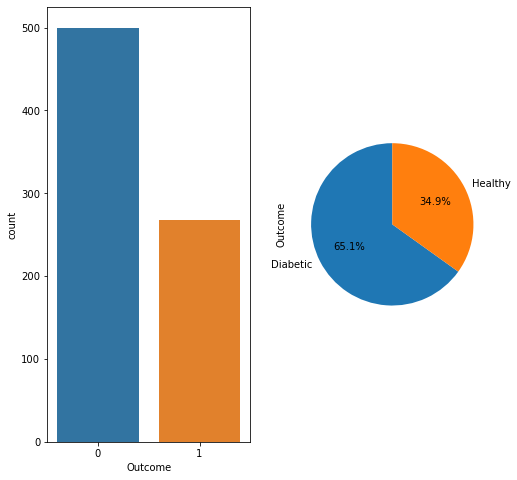

In [18]:
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observations in each categorical bin using bars

sns.countplot(df['Outcome'],ax=ax1[0])

#Find the % of diabetic and Healthy person

labels = 'Diabetic', 'Healthy'

df.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',startangle=90)

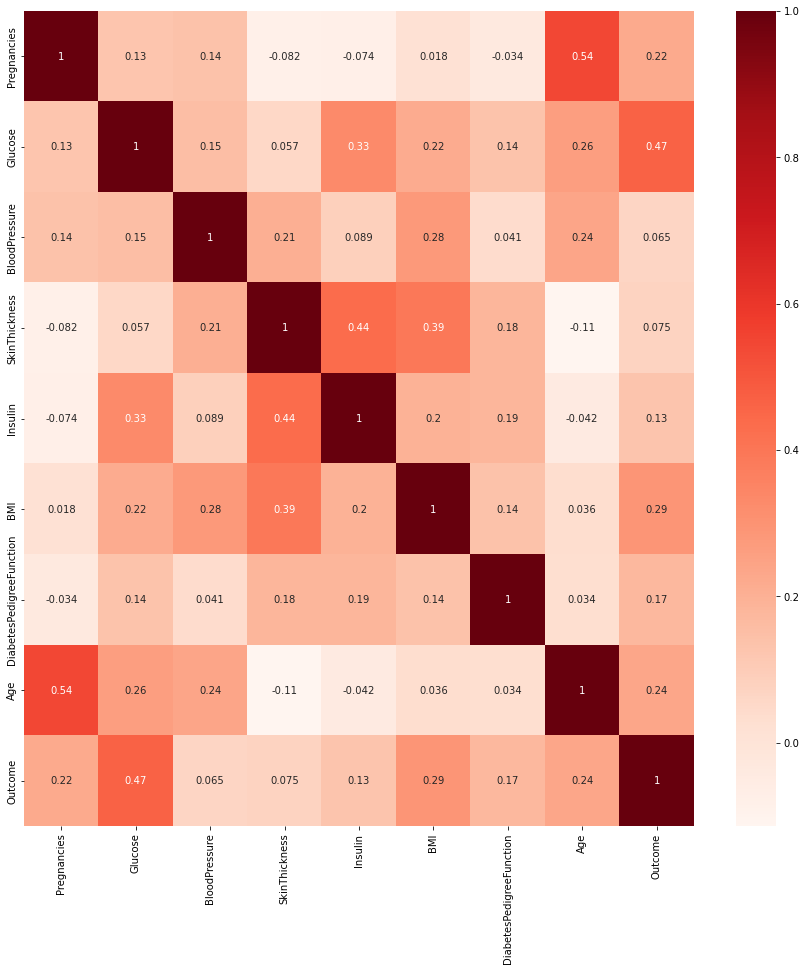

In [21]:
cor= df.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,cmap = plt.cm.Reds)

In [22]:
y= df['Outcome']

In [23]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [24]:
x = df.drop('Outcome',axis=1)

### Train and Test  model

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [27]:
scaled_feature = scaler.transform(x)

In [28]:
df_feat = pd.DataFrame(scaled_feature , columns= df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train ,x_test,y_train,y_test = train_test_split(scaled_feature,y, test_size = 0.3)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
accuracy_rate =[]
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn,df_feat,y,cv=10)
  accuracy_rate.append(score.mean())

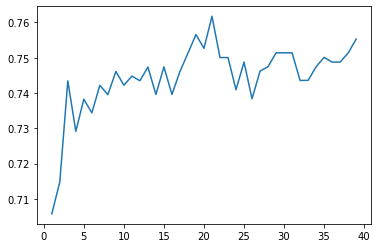

In [34]:
plt.plot(range(1,40), accuracy_rate)

In [68]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [69]:
y_pred = knn.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [71]:
accuracy_score(y_test,y_pred)

0.7012987012987013

In [72]:
confusion_matrix(y_test,y_pred)

array([[132,  22],
       [ 47,  30]], dtype=int64)

In [73]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.74      0.86      0.79       154\n           1       0.58      0.39      0.47        77\n\n    accuracy                           0.70       231\n   macro avg       0.66      0.62      0.63       231\nweighted avg       0.68      0.70      0.68       231\n'

# If we use Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [77]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_pred = model.predict(x_test)

In [79]:
accuracy_score(y_pred,y_test)

0.7186147186147186

In [80]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.84      0.80       154\n           1       0.60      0.48      0.53        77\n\n    accuracy                           0.72       231\n   macro avg       0.68      0.66      0.67       231\nweighted avg       0.71      0.72      0.71       231\n'